<a href="https://colab.research.google.com/github/RFdream/ML100-Days/blob/master/Data/Day086_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras
from keras.layers import Input, Dense, BatchNormalization
from keras.models import Model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.optimizers import SGD

import matplotlib.pyplot as plt

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 43s 0us/step


In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
def build_mlp():
    input_layer = Input(x_train.shape[1:])
    
    for i, n_units in enumerate([512, 256, 128]):
        layer = Dense(units=n_units, activation='relu', name='hidden_layer_' + str(i))
        x = layer(input_layer if i == 0 else x)
        x = BatchNormalization()(x)

    output_layer = Dense(units=10, activation='softmax', name='output_layer')(x)
    model = Model(inputs=[input_layer], outputs=[output_layer])
    return model

In [0]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [0]:
# 載入 Callbacks
def train(checkpoint=None, save_best_only=True):

    model = build_mlp()
#     model.summary()
    optimizer = SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    callbacks = []
    if checkpoint != None:
        model_ckpt = ModelCheckpoint(
            filepath='./tmp.h5',
            monitor='val_loss',
            save_best_only=save_best_only
        )
        callbacks.append(model_ckpt)


    model.fit(x_train, y_train, 
              epochs=EPOCHS,
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              verbose=0,
              callbacks=callbacks
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    # Load back
    if checkpoint != None:
        model = keras.models.load_model("./tmp.h5")
    loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
    
    plt.plot(range(len(train_loss)), train_loss, label="train loss")
    plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
    plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
    plt.legend()
    plt.title("Loss")
    plt.show()

    plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
    plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
    plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
    plt.legend()
    plt.title("Accuracy")
    plt.show()
    
    return model

NO Check
Instructions for updating:
Use tf.cast instead.
10000/10000 [==============================] - 1s 107us/step


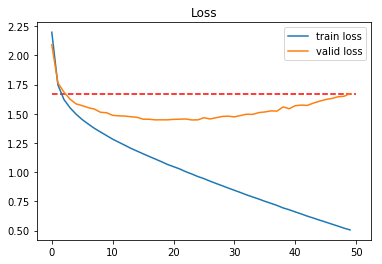

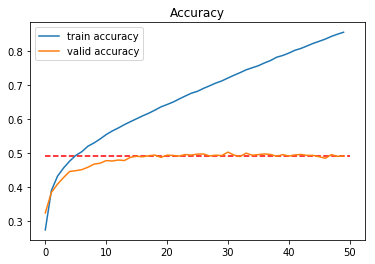

In [9]:
print('NO Check')
train()

Check & Save best only
10000/10000 [==============================] - 1s 121us/step


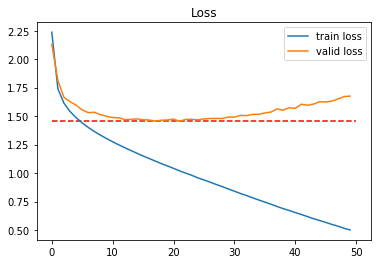

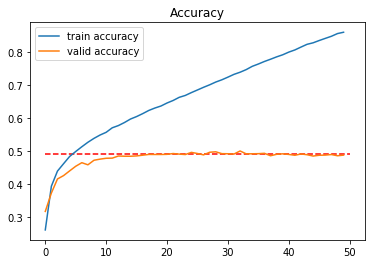

In [10]:
print('Check & Save best only')
train(True)

Check without save best only
10000/10000 [==============================] - 1s 132us/step


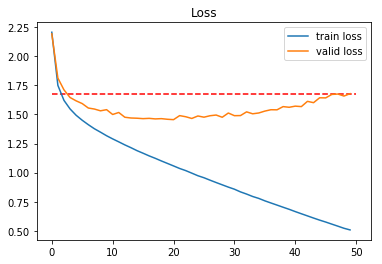

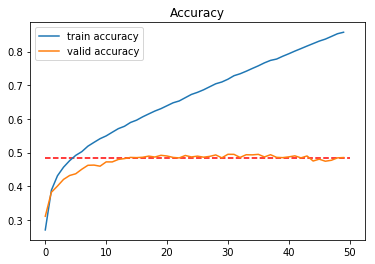

In [11]:
print('Check without save best only')
train(True,False)

Reset
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
10000/10000 [==============================] - 1s 135us/step


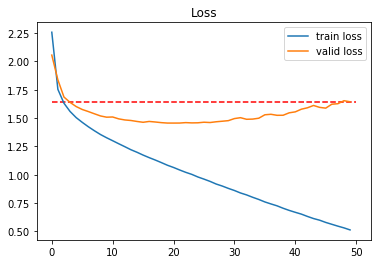

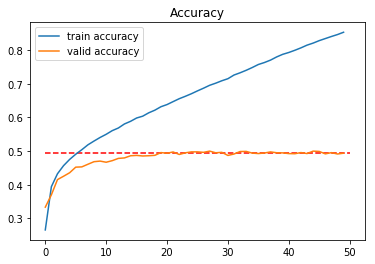

In [8]:
print('Reset')
model = train(save_best_only=True)